# Lab 6: Binary Tree

Instructor: Sirasit Lochanachit

Course: 01526102 Data Sturctures and Algorithms

# Implement a Tree using List of Lists (Array).

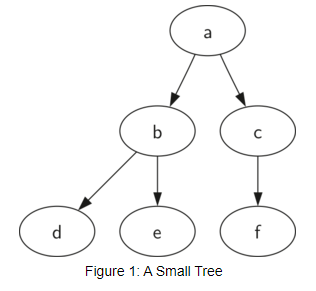

In [1]:
# A small tree with left and right subtrees

smallTree = ['A',   #root 
             ['B',  #left subtree
              ['D', [], []],    # A subtree that has a root value and two empty lists are leaf nodes
              ['E', [], []] ],  # A subtree that has a root value and two empty lists are leaf nodes
             ['C',  #right subtree
              ['F', [], []],    # A subtree that has a root value and two empty lists are leaf nodes
              []]
             ]

In [2]:
print(smallTree)

['A', ['B', ['D', [], []], ['E', [], []]], ['C', ['F', [], []], []]]


In [3]:
print('root = ', smallTree[0])
print('left subtree = ', smallTree[1])
print('right subtree = ', smallTree[2])

root =  A
left subtree =  ['B', ['D', [], []], ['E', [], []]]
right subtree =  ['C', ['F', [], []], []]


In [4]:
print('leaf node D =', smallTree[1][1] )

leaf node D = ['D', [], []]


The `BinaryTree` function creates a list with a root node and two empty sublists for the children.

*   To add a left subtree to the root, a new list has to be inserted into the 2nd position of the root list.
    * However, if there is already a node in that position, the new list needs to be pused down the tree as the left child of the list.
*   Adding right subtree can be executed by inserting into the 3rd position of the root list.



In [5]:
def BinaryTree(r):
    return [r, [], []]

""" Insertion methods """
def insertLeft(root, newBranch):
    t = root.pop(1)                       # Obtain list that corresponds to the current left child of the root
    if len(t) > 1:                        # If the left child is not empty, push the old left child as the left child of the new node.
      root.insert(1, [newBranch, t, []])
    else:                                 # If the left child is empty
      root.insert(1, [newBranch,[],[]])
    return root

def insertRight(root, newBranch):
    t = root.pop(2)                       # Obtain list that corresponds to the current right child of the root
    if len(t) > 1:                        # If the right child is not empty, push the old right child as the right child of the new node.
      root.insert(2, [newBranch, [], t])
    else:                                 # If the right child is empty
      root.insert(2, [newBranch, [], []]) 
    return root

""" Accessor methods """
def getRootVal(root):
    return root[0]

def setRootVal(root, newVal):
    root[0] = newVal

def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

Running Code Examples

In [6]:
r = BinaryTree(3)    # contents = [3, [], []]
insertLeft(r,4)      # contents = [3, [4, [], []], []]
insertLeft(r,5)      # contents = [3, [5, [4, [], []], []], []]
insertRight(r,6)     # contents = [3, [5, [4, [], []], []], [6, [], []]]
insertRight(r,7)     # contents = [3, [5, [4, [], []], []], [7, [], [6, [], []]]] 
l = getLeftChild(r)   # [5, [4, [], []], []]
print(l)

[5, [4, [], []], []]


In [7]:
setRootVal(l,9)      # contents = [3, [9, [4, [], []], []], [7, [], [6, [], []]]] 
print(r)
insertLeft(l,11)     # contents = [3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]] 
print(r)
print(getRightChild(getRightChild(r)))  # [6, [], []]

[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[3, [9, [11, [4, [], []], []], []], [7, [], [6, [], []]]]
[6, [], []]


# Implement a Binary Tree using Nodes and References (Linked Lists).

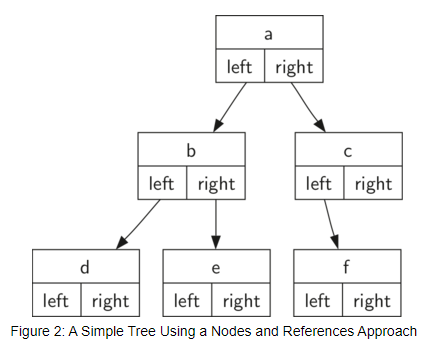

In [16]:
class BinaryTree:
  """ Tree implementation using node and reference"""
  def __init__(self, element):
      self._element = element        # reference to user’s element
      self._leftChild = None         # reference to left child
      self._rightChild = None        # reference to right child

  """ Insertion methods """
  def insertLeft(self, newNode):
      new_node = BinaryTree(newNode)
      if self._leftChild == None:    # No existing left child, add a node to the left
        self._leftChild = new_node
      else:                         # Insert a node and pust the old child down one level
        new_node._leftChild = self._leftChild
        self._leftChild = new_node
    
  
  def insertRight(self, newNode):
      new_node = BinaryTree(newNode)
      if self._rightChild == None:    # No existing right child, add a node to the right
        self._rightChild = new_node
      else:                         # Insert a node and pust the old child down one level
        new_node.rightChild = self._rightChild
        self._rightChild = new_node


  """ Accessor methods """
  def getRightChild(self):
      return self._rightChild

  def getLeftChild(self):
      return self._leftChild

  def setRootVal(self,e):
      self._element = e

  def getRootVal(self):
      return self._element

Running Code Examples

In [17]:
r = BinaryTree('a')                   # contents = [a, [], []]
print(r.getRootVal())
print(r.getLeftChild())
r.insertLeft('b')                     # contents = [a, [b, [], []], []]
print(r.getLeftChild().getRootVal())
r.insertRight('c')                    # contents = [a, [b, [], []], [c, [], []]]
print(r.getRightChild().getRootVal())
r.getRightChild().setRootVal('hello') # contents = [a, [b, [], []], [hello, [], []]]
print(r.getRightChild().getRootVal())

a
None
b
c
hello


# Implement a Binary Search Tree using Nodes and References

# Lab 6-1 

Given a class of BST_Node class and an abstract of BinarySearchTree class, implement the following BinarySearchTree methods:

# Lab 6-1.1
1. is_empty(): Check whether a BST is empty
    * Return True if a BST is empty, False otherwise.
2. _treeSearch(currentNode, target_key): Search for a given key in a BST
    * Return the node's value if found, otherwise return None
3. findMin(): Return a minimum key in a BST with a corresponding value as a tuple ex. (10, 'Shire')
4. findMax(): Return a maximum key in a BST with a corresponding value as a tuple ex. (10, 'Shire')

# Lab 6-1.2
5. _treeInsert(key, value, currentNode): Insert a given key into a BST

# Lab 6-1.3
6. traverse(): Traverse into the BST and display the results of the following traversal modes 
    - Preorder, Inorder, Postorder by calling preorder(root), inorder(root), and postorder(root) functions

# Challenge
7. _deleteNode(currentNode): Delete a node from a BST
    * Updating relevant pointers


In [8]:
class BST_Node:
  def __init__(self, key, val, left=None, right=None, parent=None):
      self._key = key
      self._value = val
      self._leftChild = left
      self._rightChild = right
      self._parent = parent

  def hasLeftChild(self):
      return self._leftChild

  def hasRightChild(self):
      return self._rightChild

  def isLeftChild(self):
      return self._parent and self._parent._leftChild == self

  def isRightChild(self):
      return self._parent and self._parent._rightChild == self

  def isRoot(self):
      return not self._parent

  def isLeaf(self):
      return not (self._rightChild or self._leftChild)

  def hasAnyChildren(self):
      return self._rightChild or self._leftChild

  def hasBothChildren(self):
      return self._rightChild and self._leftChild

  def replaceNodeData(self, key, value, lc, rc):
      self._key = key
      self._value = value
      self._leftChild = lc
      self._rightChild = rc
      if self.hasLeftChild():
        self._leftChild._parent = self
      if self.hasRightChild():
        self._rightChild._parent = self

In [ ]:
class BinarySearchTree:

    def __init__(self):
        self._root = None
        self._size = 0

    def length(self):
        return self._size

    def __len__(self):
        return self._size
    
    def __iter__(self):
        return self._root.__iter__()

    def is_empty(self):
        ########################
        ## Add your code here
        ########################
        pass
    
    def treeSearch(self, target):
        if not self.is_empty():                           # Root node exists
          result = self._treeSearch(self._root, target)              
          return result._value                            # Return the node's value (None if not found)
        else:                                             # Root node not exists
          return None

    def _treeSearch(self, currentNode, target):
        ########################
        ## Add your code here
        ########################
        pass                                  

    def findMin_re(self, root):
        ########################
        ## Add your code here
        ########################
        pass  
    
    def findMax_re(self, root):
        ########################
        ## Add your code here
        ########################
        pass  

    def treeInsert(self, key, value):
        if not self.is_empty():                           # Root node exists
          self._treeInsert(key, value, self._root)        # Insert in the tree
        else:
          self._root = BST_Node(key,value)                # Create new node and set as a root node of BST
        self._size = self._size + 1
    
    def _treeInsert(self, key, value, currentNode):
        ########################
        ## Add your code here
        ########################
        pass
      
    def preorder(self, root):
        ########################
        ## Add your code here
        ########################
        pass  

    def inorder(self, root):
        ########################
        ## Add your code here
        ########################
        pass  

    def postorder(self, root):
        ########################
        ## Add your code here
        ########################
        pass  

    def traverse(self):
        if self.is_empty():
            print("This is an empty tree.")
        else:
            print("Preorder: ")
            self.preorder(self._root)
            print("\nInorder: ")
            self.inorder(self._root)
            print("\nPostorder: ")
            self.postorder(self._root)
            print("")
    
    
    def deleteNode(self, key):  
        if self._size > 1:                                # Tree has >1 nodes
          node = self._treeSearch(self._root, key)
          if node is not None:                            # Node is found in the tree
            self._deleteNode(node)
            self._size = self._size-1
          else:                                           # Node is not found
            raise KeyError('Key not found')
        elif self._size == 1 and self._root._key == key:  # Only single node in a tree
          self._root = None
          self._size = 0
        else:
            raise KeyError('Key not found')
    
    def _deleteNode(self, currentNode):
        ########################
        ## Add your code here
        ########################
        pass

Running Code Examples

In [95]:
BST_test = BinarySearchTree()

In [76]:
# Insert a pair of key & value
BST_test.treeInsert(5, 'Middle Earth')
BST_test.treeInsert(7, 'Shire')
BST_test.treeInsert(9, 'Rohan')
BST_test.treeInsert(2, 'Gondor')

# Search for key, return the found value
print(BST_test.treeSearch(5))
print(BST_test.treeSearch(9))


Middle Earth
Rohan


In [77]:
BST_test.traverse()

Preorder: 
-> 5 -> 2 -> 7 -> 9 
Inorder: 
-> 2 -> 5 -> 7 -> 9 
Postorder: 
-> 2 -> 9 -> 7 -> 5 


In [64]:
BST_test.findMin()

(2, 'Gondor')

In [65]:
BST_test.findMin_re(BST_test._root)

(2, 'Gondor')

In [68]:
BST_test.findMax_re(BST_test._root)

(9, 'Rohan')

In [69]:
# Search for key, then delete the node
BST_test.deleteNode(9)

In [13]:
# Print the key of the root node
print(BST_test._root._key)

5


Running Code Examples 2

In [126]:
myBST = BinarySearchTree()
myBST.insertList([[14,'Frodo'], [23,'Samwise'], [7,'Merry'], [10,'Pippins'], [33,'Arwen'], [5,'Galadriel'], [20,'Sauron']])


In [127]:
myBST.traverse()

Preorder: 
-> 14 -> 7 -> 5 -> 10 -> 23 -> 20 -> 33 
Inorder: 
-> 5 -> 7 -> 10 -> 14 -> 20 -> 23 -> 33 
Postorder: 
-> 5 -> 10 -> 7 -> 20 -> 33 -> 23 -> 14 


In [ ]:
print("Min: ", myBST.findMin())
print("Max: ", myBST.findMax())